### Table of Contents
- [Getting started](#Getting-Started)
    - [Set score baseline](#Set-score-baseline)
    - [Sampling](#Sampling)
- [Feature by Feature Exploration](#Feature-by-Feature-Exploration)
    - [What does my intuition tell me?](#What-does-my-intuition-tell-me?)
    - [Type](#Type)
    - Photo
    - Video
    - Description
    - Quantity
    - Age
    - Health
    - Breed
    - Color
    - Size and Fur
    - Gender
    - State
    - Rescuer
3. Model Tweaking

# Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [31]:
def reset_dfs():
    global train_df, test_df
    train_df = pd.read_csv('../input/train/train.csv')
    test_df = pd.read_csv('../input/test/test.csv')
reset_dfs()

## Set score baseline
Let's put the cart before the horse. 
Let's get our data cleaning and feature building pipeline set up so that as we can progressively validate our hypotheses moving forward. 

The idea here is to produce the simplest, most basic predictions to use as a starting point for the rest of the process of score improvement. 

#### Explore the accompanying script, which contains the resulting data cleaning / feature building functions: 
https://www.kaggle.com/alhankeser/slow-and-steady-feature-building

According to the competition details, the evaluation metric is a **quadratic weighted kappa**, which sounds super complicated. Luckily, there is a function that I found [here](https://github.com/benhamner/Metrics/blob/master/Python/ml_metrics/quadratic_weighted_kappa.py) and that is used in few kernels. 

**Baseline Score: 0.07924**
https://www.kaggle.com/alhankeser/slow-and-steady-feature-building?scriptVersionId=9960725

## Sampling
In typical beginner fashion, I'm going to use a new and shiny strategy that I just learned about [here](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets): sampling to overcome issues related to imbalances in the target feature counts. 

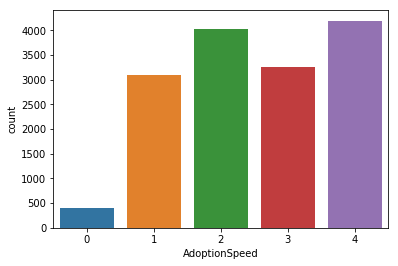

In [32]:
# Before:
sns.countplot(train_df['AdoptionSpeed']);

In [33]:
def sample(df, target_val_sets):
    for target_val_set in target_val_sets:
        df_class_0 = df[df['AdoptionSpeed'] == target_val_set[0]]
        count_1 = df['AdoptionSpeed'].value_counts()[target_val_set[1]]
        df_class_0_sampled = df_class_0.sample(count_1,replace='True')
        df = pd.merge(df.drop(df_class_0.index),
                      df_class_0_sampled, how='outer')
    return df
train_df = sample(train_df, [[0, 3], [1, 3], [2, 3], [4, 3]])

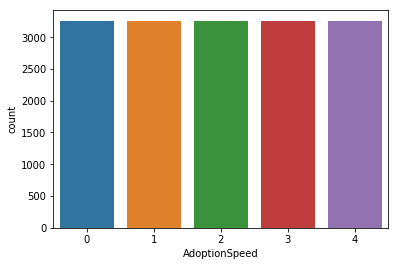

In [34]:
# After:
sns.countplot(train_df['AdoptionSpeed']);

**Score:  0.13128**

# Feature by Feature Exploration

In [38]:
from imblearn.over_sampling import RandomOverSampler